In [1]:
# ✅ Step 1: Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [3]:
# ✅ Step 2: Load dataset
df = pd.read_csv("rainfall in india 1901-2015.csv")

In [4]:
df = df.drop(['SUBDIVISION'], axis=1)
df = df.dropna()

In [5]:
df['rain_target'] = (df['ANNUAL'] > 1000).astype(int)

In [6]:
features = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
            'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

In [7]:
X_clf = df[features]
y_clf = df['rain_target']

In [8]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf)

In [9]:
sm = SMOTE(random_state=42)
X_train_clf, y_train_clf = sm.fit_resample(X_train_clf, y_train_clf)

In [11]:
clf_model = LogisticRegression(max_iter=1000)
clf_model.fit(X_train_clf, y_train_clf)

LogisticRegression(max_iter=1000)

In [12]:
y_pred_clf = clf_model.predict(X_test_clf)
print("🎯 CLASSIFICATION RESULTS")
print("✅ Accuracy:", accuracy_score(y_test_clf, y_pred_clf))
print("\n📊 Classification Report:\n", classification_report(y_test_clf, y_pred_clf))

🎯 CLASSIFICATION RESULTS
✅ Accuracy: 0.9987775061124694

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       486

    accuracy                           1.00       818
   macro avg       1.00      1.00      1.00       818
weighted avg       1.00      1.00      1.00       818



In [13]:
X_reg = df[features]
y_reg = df['ANNUAL']

In [14]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42)

In [15]:
reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)

LinearRegression()

In [17]:
y_pred_reg = reg_model.predict(X_test_reg)
print("\n🎯 REGRESSION RESULTS")
print("✅ R² Score:", r2_score(y_test_reg, y_pred_reg))
print("📉 MSE:", mean_squared_error(y_test_reg, y_pred_reg))


🎯 REGRESSION RESULTS
✅ R² Score: 0.9999999885865255
📉 MSE: 0.009879379422964693


C:\Users\KAVI\AppData\Local\Temp\ipykernel_12748\700966159.py:9: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\KAVI\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


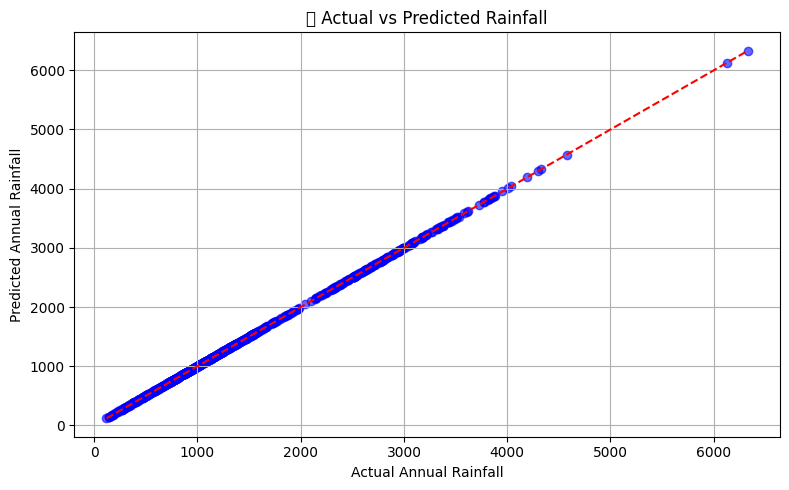

In [18]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.6, color='blue')
plt.plot([min(y_test_reg), max(y_test_reg)],
         [min(y_test_reg), max(y_test_reg)], color='red', linestyle='--')
plt.xlabel("Actual Annual Rainfall")
plt.ylabel("Predicted Annual Rainfall")
plt.title("📈 Actual vs Predicted Rainfall")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\KAVI\AppData\Local\Temp\ipykernel_12748\2574402216.py:13: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\KAVI\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


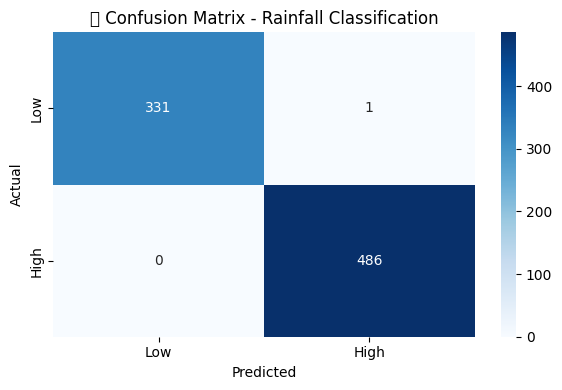

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# ✅ Calculate confusion matrix
cm = confusion_matrix(y_test_clf, y_pred_clf)

# ✅ Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('📊 Confusion Matrix - Rainfall Classification')
plt.tight_layout()
plt.show()
